In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/cervical_cancer.csv')

In [ ]:
X = data.drop('has_cancer', axis=1)
y = data['has_cancer']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_li = model.predict(X_test)

In [ ]:
y_pred_li_binary = np.where(y_pred_li >= 0.5, 1, 0)

In [ ]:
print("\n🔹 Linear Regression (rounded predictions)")
print("Accuracy:", accuracy_score(y_test, y_pred_li_binary))
print(classification_report(y_test, y_pred_li_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_li_binary))


🔹 Linear Regression (rounded predictions)
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.75      0.86      0.80         7

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20

Confusion Matrix:
 [[11  2]
 [ 1  6]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_li))
print("R2 Score:", r2_score(y_test, y_pred_li))

Mean Squared Error: 0.1546354090393755
R2 Score: 0.3202839163104375


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Cancer', 'Has Cancer']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9
 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.92      0.92      0.92        13
  Has Cancer       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix:
 [[12  1]
 [ 1  6]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, y_pred)

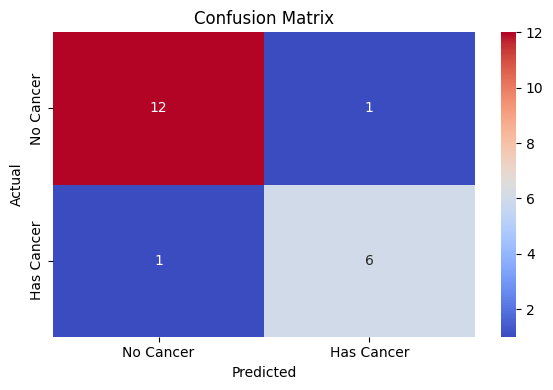

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Cancer', 'Has Cancer'], yticklabels=['No Cancer', 'Has Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()